<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
#  Análise de Risco de sinistros Residenciais com Machine Learning

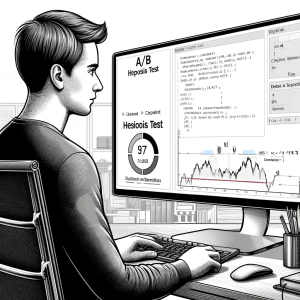

**********************************************************************************
# 1. Introdução

<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>
    Neste projeto, abordamos a complexa questão dos sinistros residenciais através de técnicas avançadas de machine learning. O objetivo é desenvolver um modelo preditivo que possa identificar o risco de sinistros com base em uma série de características das propriedades seguradas.

**********************************************************************************
# 2. Contexto

<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>
Os sinistros residenciais representam uma significativa preocupação para as seguradoras, dado que impactam diretamente na sustentabilidade financeira e na satisfação do cliente. A previsão eficaz de sinistros pode ajudar as seguradoras a aprimorar suas estratégias de precificação e mitigação de riscos.

**********************************************************************************
# 3. Problema Proposto

<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>
    O desafio consiste em analisar um conjunto de dados de propriedades residenciais e seus históricos de sinistros para construir um modelo que preveja a probabilidade de ocorrência de um sinistro. 

**********************************************************************************
# 4. Metodologia

<div style='line-height: 1.8; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
  
   
* Preparação dos Dados: Limpeza e transformação de dados para garantir a qualidade e a adequação ao modelo de machine learning.
* Exploração de Dados: Análise exploratória para entender as características e a distribuição das variáveis.
* Modelagem Estatística: Utilização de técnicas estatísticas para identificar correlações e padrões significativos.
* Desenvolvimento de Modelo de ML: Treinamento de modelos de classificação para prever sinistros.
* Validação e Teste: Avaliação do modelo através de métricas de desempenho e validação cruzada para garantir a generalização.
* Interpretação e Implementação: Discussão dos resultados e planejamento para a implementação operacional do modelo.

**********************************************************************************
# 5. Importação de Bibliotecas


## Preparação do Ambiente de Análise


<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>
    
Inicializa o ambiente de análise carregando todas as bibliotecas necessárias para manipulação de dados, análise estatística e visualização, garantindo que todas as ferramentas estejam disponíveis para as etapas subsequentes.

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind
import plotly.express as px
from IPython.display import display, Markdown, HTML
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score

# Configurações estéticas dos gráficos do Seaborn e supressão de avisos
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

# Configurações adicionais de visualização
%matplotlib inline


**********************************************************************************
# 6. Carregamento de Dados

In [2]:
# Verificação de cabeçalhos e carregamento de dados
try:
    # Verifica se o arquivo contém cabeçalho
    with open('dados_seguro_residenciais.csv', 'r') as file:
        first_line = file.readline().strip()
    has_header = any(char.isalpha() for char in first_line)  # assume cabeçalho se contiver letras

    if has_header:
        dados = pd.read_csv('dados_seguro_residenciais.csv', delimiter=';', encoding='utf-8')
    else:
        colunas = ['cidade_residencia', 'idade_prop', 'valor_imovel', ...]  # Definição completa de todas as colunas
        dados = pd.read_csv('dados_seguro_residenciais.csv', names=colunas, delimiter=';', encoding='utf-8')

    display(Markdown("<h3 style='color: darkred'>Dados carregados com sucesso!!</h3>"))
except FileNotFoundError:
    display(Markdown("<h3 style='color: darkred'>Não foi possível carregar o arquivo!!</h3>"))


<h3 style='color: darkred'>Dados carregados com sucesso!!</h3>

****************************
# 7.  Exploração e Visualização de Dados

<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>
    
Os dados são carregados para a memória. Realiza-se uma inspeção inicial para verificar a integridade e estrutura básica do conjunto de dados.

********************
## 7.1. Primeiras linhas do DataFrame para inspeção inicial


In [3]:
dados.head()

,cidade_residencia,idade_prop,valor_imovel,tipo_construcao,hist_sinistro,valor_premio_seguro,sinistro,regiao,renda_anual,historico_credito,numero_dependentes,ano_construcao,distancia_bombeiros,sistema_alarme,cameras_seguranca,estado,valor_seguro
0,São Gonçalo,71,387671.21,Condomínio Fechado,0,3752.74,0,Sudeste,77826.00,782,1,2018,6.31,0,0,Rio de Janeiro,1938.00
1,Caruaru,55,333997.09,Studio,0,1055.28,0,Nordeste,51997.00,732,1,2016,9.39,1,0,Pernambuco,1670.00
2,Manaus,62,375704.65,Sobrado,0,2567.33,0,Norte,65169.00,541,1,2006,2.97,0,1,Amazonas,1879.00
3,Maringá,77,475643.69,Sobrado,0,5345.85,1,Sul,78940.00,576,2,1989,1.75,1,0,Paraná,2378.00
4,Contagem,72,199999.49,Cobertura,0,3269.24,0,Sudeste,62200.00,487,1,2001,1.42,0,1,Minas Gerais,1000.00


******************
## 7.2. Informações sobre os tipos de dados e valores faltantes

In [4]:
display(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cidade_residencia    8000 non-null   object 
 1   idade_prop           8000 non-null   int64  
 2   valor_imovel         8000 non-null   float64
 3   tipo_construcao      8000 non-null   object 
 4   hist_sinistro        8000 non-null   int64  
 5   valor_premio_seguro  8000 non-null   float64
 6   sinistro             8000 non-null   int64  
 7   regiao               8000 non-null   object 
 8   renda_anual          8000 non-null   float64
 9   historico_credito    8000 non-null   int64  
 10  numero_dependentes   8000 non-null   int64  
 11  ano_construcao       8000 non-null   int64  
 12  distancia_bombeiros  8000 non-null   float64
 13  sistema_alarme       8000 non-null   int64  
 14  cameras_seguranca    8000 non-null   int64  
 15  estado               8000 non-null   o

None

In [5]:
display(Markdown(f"<h3 style='color: darkblue'> Não foi encontrado dados faltantes no DataSet.</h3>"))


<h3 style='color: darkblue'> Não foi encontrado dados faltantes no DataSet.</h3>

In [6]:
display(Markdown(f"<h3 style='color: darkblue'> Verificamos a existência de {dados.shape[0]} observações e {dados.shape[1]} colunas no DataSet.</h3>"))


<h3 style='color: darkblue'> Verificamos a existência de 8000 observações e 17 colunas no DataSet.</h3>

**********************************************************************************
## 7.3. Apresenta Metadados de Cada Variável:


    
  
| Variável         | Descrição                                                    | Tipo de Dados |
|------------------|--------------------------------------------------------------|---------------|
| `cidade_residencia`      | Nome da cidade da propriedade segurada             | `object`      |
| `idade_prop`     | Idade do proprietário da propriedade                         | `int64`       |
| `valor_imovel`   | Valor estimado da propriedade                                | `float64`     |
| `tipo_construcao`| Tipo de construção da propriedade (casa, apartamento, etc.)  | `object`      |
| `hist_sinistro`  | Indica se houve sinistros anteriores na propriedade (1 para sim, 0 para não)| `object`      |
| `valor_premio_seguro` | Valor do prêmio do seguro da propriedade                     | `float64`     |
| `sinistro`       | Indica se ocorreu um sinistro (0 para Não, 1 para Sim)       | `int64`       |
| `regiao`         | Informa qual das regiões presentes no Brasil está o imóvel   | `object`      |
| `renda_anual`    | Renda anual do proprietário da propriedade                   | `float64`     |
| `historico_credito` | Score de crédito do proprietário                           | `int64`       |
| `numero_dependentes` | Número de pessoas dependentes do proprietário              | `int64`       |
| `ano_construcao`  | Ano de construção da propriedade                             | `int64`       |
| `distancia_bombeiros` | Distância até a estação de bombeiros mais próxima        | `float64`     |
| `sistema_alarme` | Indica se a propriedade possui sistema de alarme (1 para sim, 0 para não) | `int64` |
| `cameras_seguranca` | Indica se a propriedade possui câmeras de segurança (1 para sim, 0 para não) | `int64` |
| `estado`         | Estado onde a propriedade está localizada                    | `object`      |
| `valor_seguro`   | Valor total do seguro da propriedade                         | `float64`     |

</div>


*************************
## 7.3.1 Contabilizando o número de valores únicos em cada variável do dataset.

In [7]:
# Contabilizando o número de valores únicos em cada variável do dataset.

num_valor_unico = dados.nunique().sort_values()

# Determinando o tipo de dado de cada uma das variáveis do dataset.

num_valor_unico = pd.DataFrame(num_valor_unico.values, index = num_valor_unico.index, columns = ['valor_unicos'])

# Atribuindo informações sobre o tipo de dado das variáveis ao DataFrame.

num_valor_unico

,valor_unicos
cameras_seguranca,2
hist_sinistro,2
sistema_alarme,2
sinistro,2
numero_dependentes,4
regiao,5
tipo_construcao,9
estado,11
cidade_residencia,32
ano_construcao,42


*********************
## 7.4. Análise de dados faltantes

In [8]:
# Calcula o total e a porcentagem de dados faltantes por coluna

total_faltantes = dados.isnull().sum()

percentual_faltantes = (dados.isnull().mean() * 100)

# Criar um DataFrame para a tabela resumida

tabela_resumo_faltantes = pd.DataFrame({
    'Coluna': total_faltantes.index,
    
    'Dados Faltantes': total_faltantes.values,
    
    'Percentual (%)': percentual_faltantes.values
})

# Ordenar a tabela pelo número de dados faltantes

if (total_faltantes > 0).any():
    tabela_resumo_faltantes = tabela_resumo_faltantes.sort_values(by='Dados Faltantes', ascending=False)
else:
    tabela_resumo_faltantes = tabela_resumo_faltantes
# Exibi a tabela resumida

display(Markdown("<h3 style='color: darkblue'>Tabela Resumo de Dados Faltantes</h3>"))

print(tabela_resumo_faltantes)

<h3 style='color: darkblue'>Tabela Resumo de Dados Faltantes</h3>

                 Coluna  Dados Faltantes  Percentual (%)
0     cidade_residencia                0            0.00
1            idade_prop                0            0.00
2          valor_imovel                0            0.00
3       tipo_construcao                0            0.00
4         hist_sinistro                0            0.00
5   valor_premio_seguro                0            0.00
6              sinistro                0            0.00
7                regiao                0            0.00
8           renda_anual                0            0.00
9     historico_credito                0            0.00
10   numero_dependentes                0            0.00
11       ano_construcao                0            0.00
12  distancia_bombeiros                0            0.00
13       sistema_alarme                0            0.00
14    cameras_seguranca                0            0.00
15               estado                0            0.00
16         valor_seguro        

******************************
## 7.5 Análise de Dados Duplicados

In [9]:
# Conta o número de registros duplicados

numero_duplicados = dados.duplicated().sum()

# total_registros recebe quantidade total de registros

total_registros=len(dados)  

# calcula a porcentagem de duplicatas em relação ao total

percentual_duplicados = (numero_duplicados / total_registros) * 100 


if numero_duplicados > 0: # informa quantidade de dados duplicados
  
    display(Markdown(f"<h3 style='color: darkred'>Foram encontrados {numero_duplicados} registros duplicados, representando {percentual_duplicados:.2f}% do total de {dados.shape[0]} registros!</h3>"))
    
else:  # informa se não existe dados duplicados 
   
    display(Markdown("<h2 style='color: red'>Não foram encontrados dados duplicados no conjunto de dados</h2>"))


print()

<h2 style='color: red'>Não foram encontrados dados duplicados no conjunto de dados</h2>

**********************
## 7.6. Visualizando da Distribuição da Idade dos Proprietários


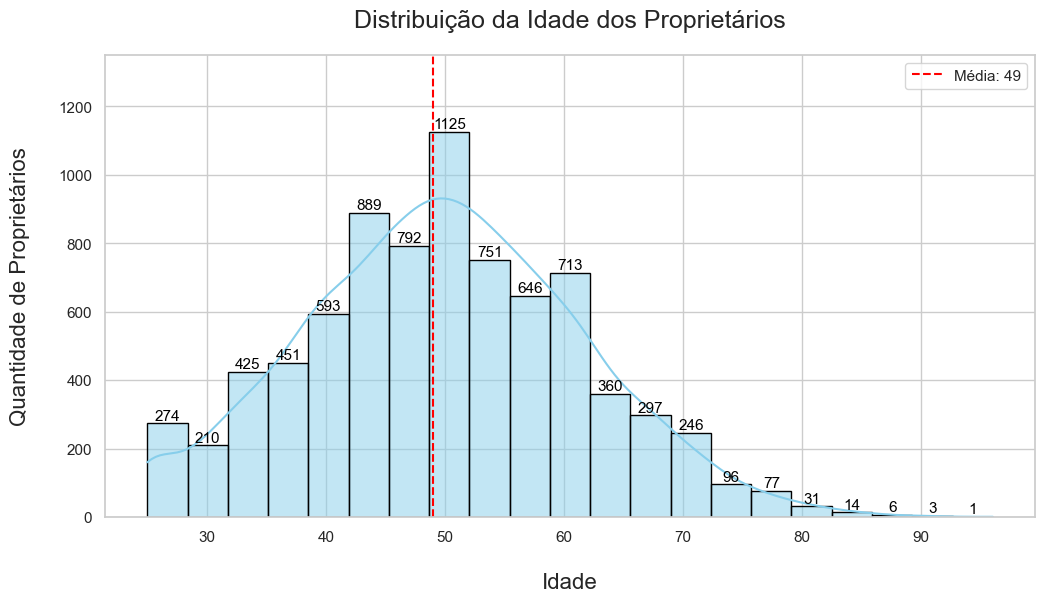

In [10]:
# Histograma simplificado da idade dos proprietários

plt.figure(figsize=(12, 6)) # define dimenção do gráfico

bins_valor = range(21, 75, 5)  # Definindo bins de 21 a 75 com passo de 5

histograma = sns.histplot(dados['idade_prop'], bins=21, kde=True, color='skyblue', edgecolor='black')

# Agora, ajustando os limites do eixo Y conforme a frequência máxima
max_height = histograma.patches[0].get_height()  # Começa com a altura da primeira barra

for patch in histograma.patches:
    
    if patch.get_height() > max_height:
        
        max_height = patch.get_height()  # Encontra a altura máxima

plt.ylim(0, max_height * 1.2)  # Define o limite superior do eixo y como 10% acima da barra mais alta


# Títulos e rótulos
plt.title('Distribuição da Idade dos Proprietários', fontsize=18, pad=20)   # pad define valor para espaçamento
plt.xlabel('Idade', fontsize=16, labelpad=20)
plt.ylabel('Quantidade de Proprietários', fontsize=16, labelpad=20)


# Calculando a média e convertendo para inteiro
media_idade = int(np.mean(dados['idade_prop']))

# Desenhando uma linha vertical na média e adicionando uma legenda com o valor da média
plt.axvline(media_idade, color='red', linestyle='--', label=f'Média: {media_idade}')


for p in histograma.patches:
    plt.text(
        p.get_x() + p.get_width() / 2.,  # posição x
        
        p.get_height() +1,  # posição y
        
        f'{int(p.get_height())}',  # valor inteiro da altura
        
        fontsize=11,  # tamanho da fonte
        
        color='black',  # cor do texto
        
        ha='center',  # alinhamento horizontal
        
        va='bottom',  # alinhamento vertical
    )

# Legenda
plt.legend()

# Exibir o gráfico
plt.show()




# 7.7 Análise de frequência de sinistros por faixa de idade


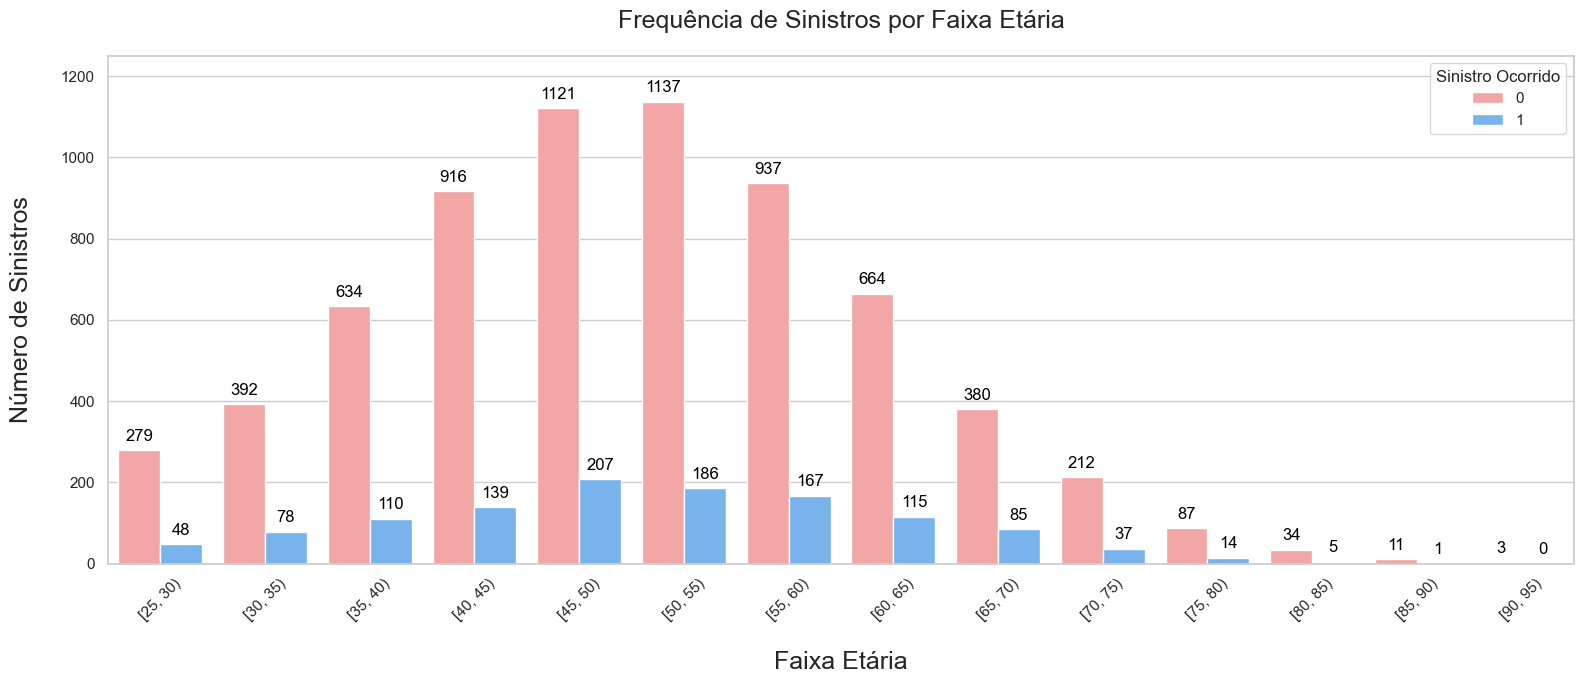

Resultado do Teste Qui-Quadrado: chi2 = 10.19, p-value = 0.6783


In [11]:


# Agrupando as idades em faixas de 5 anos
dados['faixa_etaria'] = pd.cut(dados['idade_prop'], bins=np.arange(25, 100, 5), right=False)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Criando o gráfico de frequência de sinistros por faixa etária
plt.figure(figsize=(16, 7))
ax = sns.countplot(x='faixa_etaria', hue='sinistro', data=dados, palette=colors)
plt.title('Frequência de Sinistros por Faixa Etária', fontsize=18, pad=20)
plt.xlabel('Faixa Etária', labelpad=20, fontsize=18)
plt.ylabel('Número de Sinistros', labelpad=20, fontsize=18)
plt.xticks(rotation=45)
plt.legend(title='Sinistro Ocorrido', loc='upper right')
plt.ylim(0, 1250)  # Aumentando o limite superior para melhor visualização

# Adicionando os valores de sinistro acima de cada barra
for p in ax.patches:
   ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

# Análise estatística da diferença entre as faixas etárias
from scipy.stats import chi2_contingency

# Criando a tabela de contingência
contingencia = pd.crosstab(dados['faixa_etaria'], dados['sinistro'])

# Realizando o teste qui-quadrado
chi2, p, _, _ = chi2_contingency(contingencia)

print(f'Resultado do Teste Qui-Quadrado: chi2 = {chi2:.2f}, p-value = {p:.4f}')


********************************************
## 7.8. Análise de sinistros e Histórico de sinistros Residenciais


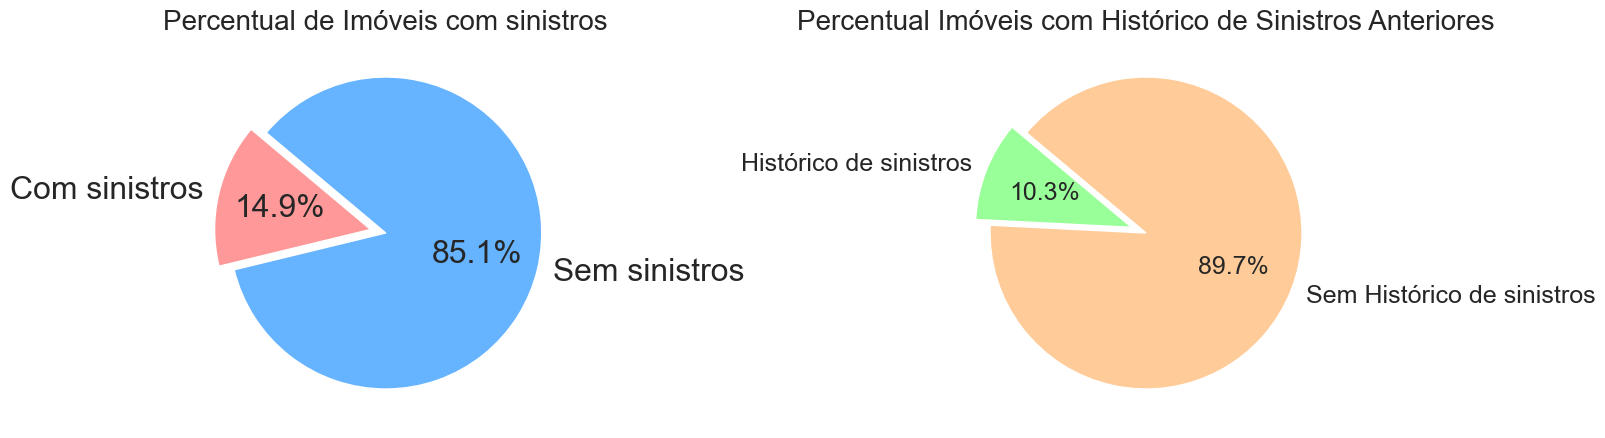

Correlação entre histórico de sinistros e ocorrência de novos sinistros: 
               hist_sinistro  sinistro
hist_sinistro           1.00      0.00
sinistro                0.00      1.00


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando os percentuais
percentual_sinistro = dados['sinistro'].mean() * 100
percentual_hist_sinistro = (dados['hist_sinistro'] == 1).mean() * 100

total_imoveis = dados.shape[0]
imoveis_sinistro = total_imoveis * (percentual_sinistro / 100)

# Preparando os dados para o gráfico de pizza
percentuais = [percentual_sinistro, 100 - percentual_sinistro,
               percentual_hist_sinistro, 100 - percentual_hist_sinistro]

labels = ['Com sinistros', 'Sem sinistros', 'Histórico de sinistros', 'Sem Histórico de sinistros']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0.1, 0)  # somente explode as fatias de sinistros

# Configuração do autopct para usar uma fonte maior para as porcentagens
autopct = lambda p: f'{p:.1f}%' if p > 0 else ''

# Criando os gráficos de pizza com a fonte das porcentagens maior
fig, axs = plt.subplots(1, 2, figsize=(16, 9))

axs[0].pie(percentuais[:2], explode=explode[:2], labels=labels[:2], colors=colors[:2], 
           autopct=autopct, startangle=140, textprops={'fontsize': 23})
axs[0].set_title('Percentual de Imóveis com sinistros', fontsize=20)

axs[1].pie(percentuais[2:], explode=explode[2:], labels=labels[2:], colors=colors[2:], 
           autopct=autopct, startangle=140, textprops={'fontsize': 18})
axs[1].set_title('Percentual Imóveis com Histórico de Sinistros Anteriores', fontsize=20)

plt.tight_layout()
plt.show()

# Análise da correlação entre histórico de sinistros e ocorrência de novos sinistros
correlacao = dados[['hist_sinistro', 'sinistro']].corr()
print(f'Correlação entre histórico de sinistros e ocorrência de novos sinistros: \n{correlacao}')


********************************************
## 7.9. Valores únicos das variáveis categórica

In [13]:
# Verifica o número de valores únicos para cada variável categórica
unicos = dados[['cidade_residencia', 'tipo_construcao', 'hist_sinistro']].apply(lambda x: x.nunique())
print(unicos)


cidade_residencia    32
tipo_construcao       9
hist_sinistro         2
dtype: int64


***************************************
## 7.10. Resumo Estatístico das Variáveis Numéricas

In [14]:

# Configurando a formatação global de números flutuantes para duas casas decimais

pd.options.display.float_format = '{:.2f}'.format

# Gerando o resumo estatístico dos dados
estatisticas = dados.describe()

# Renomeando as colunas e índices do resumo estatístico para português
estatisticas.rename(columns={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio_padrão',
    'min': 'mínimo',
    '25%': '1º quartil 25%',
    '50%': 'mediana 50%',
    '75%': '3º quartil 75%',
    'max': 'máximo'
}, index={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio_padrão',
    'min': 'mínimo',
    '25%': '1º quartil 25%',
    '50%': 'mediana 50%',
    '75%': '3º quartil 75%',
    'max': 'máximo'
}, inplace=True)

# Imprimindo o resumo estatístico formatado e traduzido
print(estatisticas)


                idade_prop  valor_imovel  hist_sinistro  valor_premio_seguro  \
contagem           8000.00       8000.00        8000.00              8000.00   
média                49.91     299781.42           0.10              2523.50   
desvio_padrão        11.68     114530.75           0.30              1126.52   
mínimo               25.00     100047.46           0.00               768.43   
1º quartil 25%       42.00     202121.23           0.00              1634.05   
mediana 50%          50.00     299729.24           0.00              2446.56   
3º quartil 75%       58.00     396628.12           0.00              3262.89   
máximo               96.00     499957.07           1.00              6422.88   

                sinistro  renda_anual  historico_credito  numero_dependentes  \
contagem         8000.00      8000.00            8000.00             8000.00   
média               0.15     50169.96             574.00                1.48   
desvio_padrão       0.36     15124.66  

*********************
## 7.11. Teste t de Student para Comparação de Médias
<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>

Comparação das médias do valor do prêmio de seguro entre propriedades com e sem sinistros, assumindo que os dados são normalmente distribuídos.

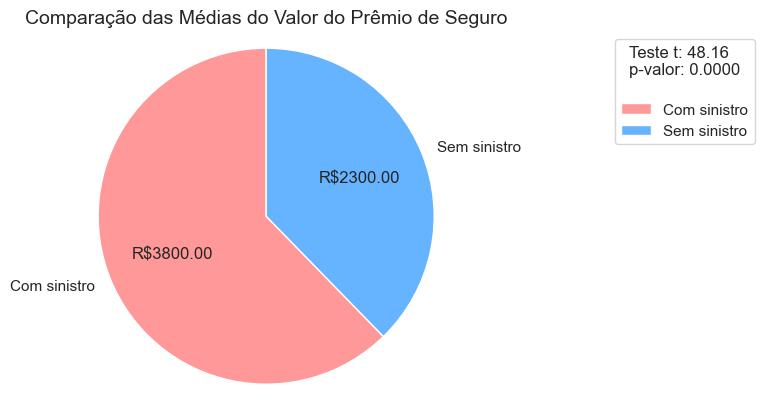

In [15]:
# Bibliotecas para análise estatística
from scipy.stats import ttest_ind

# Dividindo os dados em dois grupos: com sinistros e sem sinistros
grupo_com_sinistro = dados[dados['sinistro'] == 1]['valor_premio_seguro']
grupo_sem_sinistro = dados[dados['sinistro'] == 0]['valor_premio_seguro']

# Garantindo que não há valores NaN antes de realizar o teste t
grupo_com_sinistro = grupo_com_sinistro.dropna()
grupo_sem_sinistro = grupo_sem_sinistro.dropna()

# Realizando o teste t de Student
t_stat, p_valor = ttest_ind(grupo_com_sinistro, grupo_sem_sinistro)

# Calculando as médias dos dois grupos para o gráfico de pizza
media_com_sinistro = grupo_com_sinistro.mean()
media_sem_sinistro = grupo_sem_sinistro.mean()

# Criando o gráfico de pizza com as médias dos grupos
labels = ['Com sinistro', 'Sem sinistro']
sizes = [media_com_sinistro, media_sem_sinistro]
colors = ['#ff9999', '#66b3ff']  # Cores para cada grupo

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct=lambda p: f'R${p * sum(sizes) / 100:.2f}',
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Comparação das Médias do Valor do Prêmio de Seguro')


# Título e anotações
plt.title('Comparação das Médias do Valor do Prêmio de Seguro', fontsize=14)

# Colocando a legenda com os resultados do teste t abaixo da legenda de cores
ax.legend(loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1), title=f'Teste t: {t_stat:.2f}\np-valor: {p_valor:.4f}\n')



# Exibindo o gráfico
plt.show()




**********************************************************************************
# 8. Preprocessamento dos Dados: Codificação de Variáveis Categóricas

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['cameras_seguranca', 'hist_sinistro', 'sistema_alarme', 'sinistro', 'numero_dependentes', 'regiao', 'tipo_construcao', 'estado']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
    ], remainder='passthrough')

dados_transformados = preprocessor.fit_transform(dados)




In [17]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['cameras_seguranca', 'hist_sinistro',
                                  'sistema_alarme', 'sinistro',
                                  'numero_dependentes', 'regiao',
                                  'tipo_construcao', 'estado'])])

# 9. Processamento de Dados, PCA e Regressão Linear

## Aplicação de PCA e regressão linear em dados transformados

In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Definição das colunas categóricas e numéricas
colunas_categoricas = ['tipo_construcao', 'estado', 'regiao', 'sistema_alarme', 'cameras_seguranca']
colunas_numericas = ['idade_prop', 'valor_imovel', 'valor_premio_seguro', 'renda_anual', 'distancia_bombeiros']

# Preparação do transformador de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colunas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
    ])

# Transformando os dados
dados_transformados = preprocessor.fit_transform(dados)

# Aplicação do TruncatedSVD com um número apropriado de componentes
svd = TruncatedSVD(n_components=20)  # Ajuste para um número menor que 34
X_svd = svd.fit_transform(dados_transformados)

# Divisão dos dados em conjuntos de treinamento e teste
y = dados['valor_premio_seguro']
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

# Treinamento do modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Avaliação do modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse}')



Erro Quadrático Médio (MSE): 2.675293164495722


# 10. Visualização de Valores Reais vs. Preditos

RESULTADO:
Erro Quadrático Médio (MSE): 947002.49
Raiz do Erro Quadrático Médio (RMSE): 973.14
Coeficiente de Determinação (R²): 0.19


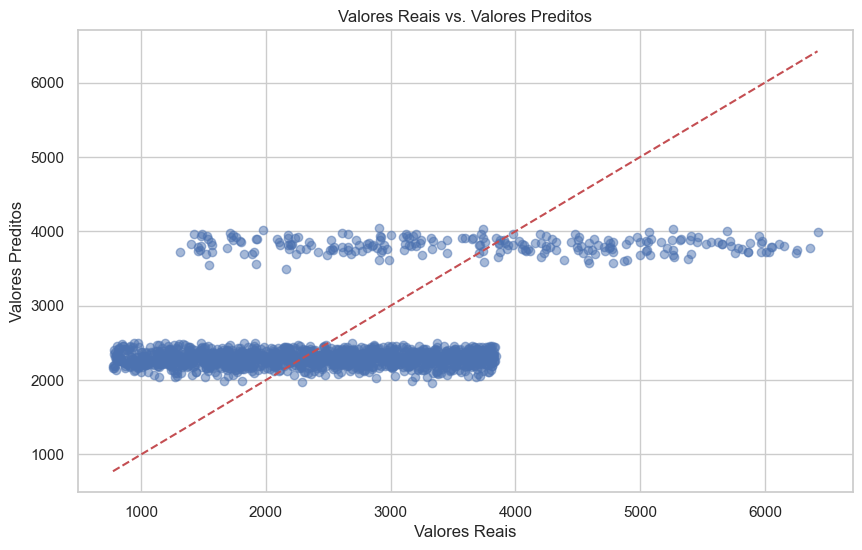

In [29]:

# Separar os dados em características (X) e alvo (y)
X = dados.drop('valor_premio_seguro', axis=1)
y = dados['valor_premio_seguro']

# Definição das colunas categóricas e numéricas
colunas_categoricas = ['cidade_residencia', 'tipo_construcao', 'regiao', 'estado']
colunas_numericas = ['idade_prop', 'valor_imovel', 'hist_sinistro', 'sinistro', 'renda_anual', 'historico_credito', 
                     'numero_dependentes', 'ano_construcao', 'distancia_bombeiros', 'sistema_alarme', 'cameras_seguranca']

# Pipeline de pré-processamento para colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline de pré-processamento para colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Aplicação dos transformadores às respectivas colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, colunas_numericas),
        ('cat', categorical_transformer, colunas_categoricas)
    ])

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construção do pipeline de modelo
modelo = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', LinearRegression())])

# Treinamento do modelo
modelo.fit(X_train, y_train)

# Previsão dos valores no conjunto de teste
y_pred = modelo.predict(X_test)

# Cálculo das métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RESULTADO:")
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

# Visualização de valores reais vs preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de identidade
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Valores Preditos')
plt.show()


# Analise do Resultado e do Gráfico

<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>

<p><strong>RESULTADO:</strong></p>

<ul>
<li><strong>Erro Quadrático Médio (MSE):</strong> 947002.49</li>
<li><strong>Raiz do Erro Quadrático Médio (RMSE):</strong> 973.14</li>
<li><strong>Coeficiente de Determinação (R²):</strong> 0.19</li>
</ul>

</div>

<div style='line-height: 1.5; color: #000000; font-size: 16px; font-family: Arial, sans-serif;'>

<p><strong>Erro Quadrático Médio (MSE):</strong></p>
<p>O MSE é uma métrica que mede a média dos quadrados dos erros, ou seja, a média das diferenças quadráticas entre os valores reais e os valores preditos. Um MSE mais baixo indica que os valores previstos estão mais próximos dos valores reais. <strong>MSE de 947002.49 é relativamente alto</strong>, indicando que os valores previstos pelo modelo estão, em média, bastante distantes dos valores reais.</p>

<p><strong>Raiz do Erro Quadrático Médio (RMSE):</strong></p>
<p>O RMSE fornece uma medida da magnitude média dos erros de previsão, mantendo a mesma unidade dos valores previstos. Um RMSE mais baixo também indica uma melhor precisão do modelo. <strong>RMSE de 973.14 sugere que, em média, as previsões do modelo estão a cerca de 973 unidades dos valores reais.</strong></p>

<p><strong>Coeficiente de Determinação (R²):</strong></p>
<p>O R² mede a proporção da variância nos valores reais que é explicada pelo modelo. Ele varia de 0 a 1, onde 1 indica que o modelo explica perfeitamente toda a variância dos dados, e 0 indica que o modelo não explica nenhuma variação. <strong>Um R² de 0.19 significa que apenas 19% da variância nos dados reais é explicada pelo modelo.</strong> Isso indica que o modelo tem um baixo poder preditivo e não está capturando bem a relação entre as variáveis independentes e a variável dependente.</p>

</div>

<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>

<p><strong>GRÁFICO:</strong></p>

</div>

<div style='line-height: 1.5; color: #000000; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>A dispersão dos pontos mostra uma falta de alinhamento com a linha de identidade, <strong>indicando que as previsões do modelo são inconsistentes com os valores reais.</strong> Há uma concentração de pontos em duas faixas horizontais, <strong>sugerindo que o modelo pode estar subestimando ou superestimando</strong> consistentemente para certos intervalos de valores reais.</p>

</div>

<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>

<p><strong>CONCLUSÃO:</strong></p>

</div>

<div style='line-height: 1.5; color: #000000; font-size: 16px; font-family: Arial, sans-serif;'>
Os resultados indicam que o modelo de regressão logística utilizado para prever os valores dos sinistros não está funcionando bem. As previsões estão longe dos valores reais, conforme evidenciado pelo alto RMSE e pelo baixo R².


# 11. Configuração dos Transformadores para os Dados

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_features = ['idade_prop', 'valor_imovel', 'valor_premio_seguro']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, ['tipo_construcao', 'hist_sinistro'])
    ])

# Aplicando transformações e construindo um pipeline
from sklearn.linear_model import LogisticRegression
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression())])


# 12. Modelagem e Avaliação: Regressão Logística para Previsão de sinistros

AUC-ROC: 0.49


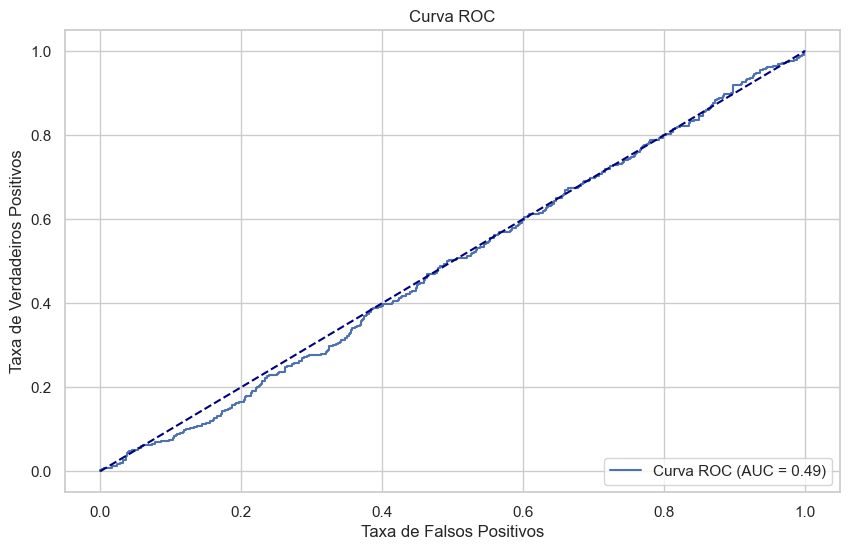

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.00      0.00      0.00       350

    accuracy                           0.85      2400
   macro avg       0.43      0.50      0.46      2400
weighted avg       0.73      0.85      0.79      2400



In [26]:
from sklearn.metrics import roc_curve
# Separa as colunas de características (X) e a coluna alvo (y)
X = dados.drop('sinistro', axis=1) # X contém todas as colunas exceto 'sinistro'.
y = dados['sinistro']              # y contém apenas a coluna 'sinistro' que queremos prever.

# Definição das colunas categóricas e numéricas
colunas_categoricas = ['cidade_residencia', 'tipo_construcao', 'regiao', 'estado']

colunas_numericas = ['idade_prop', 'valor_imovel', 'hist_sinistro', 'renda_anual', 'historico_credito', 
                     'numero_dependentes', 'ano_construcao', 'distancia_bombeiros', 'sistema_alarme', 'cameras_seguranca']

# Construção dos Transformadores:

#********** Pipeline de pré-processamento para colunas numéricas *****************************
'''
Preenche valores faltantes com a mediana.
Padroniza os valores (subtrai a média e divide pelo desvio padrão).
'''
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#********** Pipeline de pré-processamento para colunas categóricas ****************************
'''
Preenche valores faltantes com o valor mais frequente.
Converte categorias em variáveis dummy (one-hot encoding).
'''
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#*********** Pipeline de pré-processamento *****************************

# Aplica as transformações definidas para colunas numéricas e categóricas.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, colunas_numericas),
        ('cat', categorical_transformer, colunas_categoricas)
    ])

#*********** Pipeline de modelagem *****************************

# Combina o pré-processamento com o modelo de regressão logística em um único pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Divisão dos dados em conjuntos de treinamento e teste, sendo 70% para treino e 30% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Ajuste do pipeline de pré-processamento e modelagem aos dados de treinamento
model_pipeline.fit(X_train, y_train) # Ajusta (treina) o pipeline com os dados de treino

# Prevendo probabilidades para a curva ROC
y_prob = model_pipeline.predict_proba(X_test)[:, 1] # Gera previsões de probabilidades para a classe positiva (sinistro).

# Calculando a AUC-ROC - área sob a curva ROC, uma métrica de performance do modelo
auc = roc_auc_score(y_test, y_prob) 
print(f'AUC-ROC: {auc:.2f}')

# Calcula os valores para a curva ROC: taxas de falsos positivos (fpr) e verdadeiros positivos (tpr).
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
'''
fpr: 
Representa a proporção de exemplos negativos que foram incorretamente classificados como positivos.
Calculado como: FPR = FP / (FP + TN), onde FP são os falsos positivos e TN são os verdadeiros negativos.

tpr:
Proporção de exemplos positivos que foram corretamente classificados como positivos - conhecido como sensibilidade ou recall.
Calculado como: TPR = TP / (TP + FN), onde TP são os verdadeiros positivos e FN são os falsos negativos.

thresholds (Limiares):
Valores de corte (thresholds) utilizados para determinar se uma probabilidade prevista deve ser classificada como positiva ou negativa.
Um threshold de 0.5 significa que se a probabilidade prevista for maior ou igual a 0.5, o exemplo será classificado como positivo, 
caso contrário, será classificado como negativo.

roc_curve calcula o fpr e o tpr para vários valores de thresholds, permitindo a construção da Curva ROC.
'''
# y_test: Os rótulos verdadeiros do conjunto de teste.
# As probabilidades previstas para a classe positiva (neste caso, a probabilidade de um sinistro ocorrer)


# Plotando a curva ROC 
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Relatório de classificação
y_pred = model_pipeline.predict(X_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


## 13. Rebalanceamento de Classes

Usamos aqui técnicas como SMOTE para ajudar a equilibrar a distribuição entre classes minoritárias e majoritárias, melhorando o desempenho do modelo em dados desbalanceados.

In [ ]:


# Separar os dados em características (X) e alvo (y)
X = dados.drop('sinistro', axis=1)
y = dados['sinistro']

# Definição das colunas categóricas e numéricas
colunas_categoricas = ['cidade_residencia', 'tipo_construcao', 'regiao', 'estado']
colunas_numericas = ['idade_prop', 'valor_imovel', 'hist_sinistro', 'renda_anual', 'historico_credito', 
                     'numero_dependentes', 'ano_construcao', 'distancia_bombeiros', 'sistema_alarme', 'cameras_seguranca']

# Pipeline de pré-processamento para colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline de pré-processamento para colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Aplicação dos transformadores às respectivas colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, colunas_numericas),
        ('cat', categorical_transformer, colunas_categoricas)
    ])

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuste do pré-processador aos dados de treinamento
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Rebalanceamento dos dados com ADASYN
adasyn = ADASYN(random_state=42)
X_train_res, y_train_res = adasyn.fit_resample(X_train_transformed, y_train)

# Treinamento do modelo de regressão logística com os dados reamostrados
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
logistic_model.fit(X_train_res, y_train_res)

# Previsões e avaliação do modelo
y_pred_res = logistic_model.predict(X_test_transformed)
print("Relatório de Classificação após ADASYN:\n", classification_report(y_test, y_pred_res))


## 14.  Avaliação Cruzada e Validação

Realizamos a técnica validação cruzada para avaliar a capacidade de generalização do modelo de machine learning e testar sua robustez, garantindo que o desempenho é estável em diferentes subconjuntos do dado.

Ao dividir o conjunto de dados em várias menores partições e treinar o modelo em diferentes combinações dessas partições, a validação cruzada busca garantir que o modelo seja eficaz em diferentes amostras dos dados, reduzindo o risco de overfitting e proporcionando uma avaliação mais confiável do desempenho do modelo.

In [ ]:

# Separar os dados em características (X) e alvo (y)
X = dados.drop('sinistro', axis=1)
y = dados['sinistro']

# Definição das colunas categóricas e numéricas
colunas_categoricas = ['cidade_residencia', 'tipo_construcao', 'regiao', 'estado']
colunas_numericas = ['idade_prop', 'valor_imovel', 'hist_sinistro', 'renda_anual', 'historico_credito', 
                     'numero_dependentes', 'ano_construcao', 'distancia_bombeiros', 'sistema_alarme', 'cameras_seguranca']

# Pipeline de pré-processamento para colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline de pré-processamento para colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Aplicação dos transformadores às respectivas colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, colunas_numericas),
        ('cat', categorical_transformer, colunas_categoricas)
    ])

# Transformar todos os dados usando o pré-processador
X_transformed = preprocessor.fit_transform(X)

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Construção do pipeline de modelo
logistic_model = Pipeline(steps=[('classifier', LogisticRegression(solver='liblinear', random_state=42))])

# Treinamento do modelo
logistic_model.fit(X_train, y_train)

# Avaliação com validação cruzada
scores = cross_val_score(logistic_model, X_transformed, y, cv=5, scoring='f1_macro')
print("Scores de validação cruzada:", scores)
print("Média dos scores:", np.mean(scores))



## 15 Feature Engineering

Adicionando Interações entre Variáveis.
Criamos aqui novas variáveis através de interações ou transformações que podem revelar padrões mais complexos e melhorar a capacidade preditiva do modelo.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Criando interações de segundo grau entre as variáveis
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_transformed)

# Dividindo os dados novamente após a transformação
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Treinando o modelo com as novas features
logistic_model.fit(X_train_poly, y_train_poly)
y_pred_poly = logistic_model.predict(X_test_poly)

print("Relatório de Classificação com Feature Engineering:\n", classification_report(y_test_poly, y_pred_poly))


**********************************************

# 16 Separação e Preparação Inicial dos Dados para Modelagem

In [ ]:
# preparação inicial dos dados
import pandas as pd
from sklearn.model_selection import train_test_split

# separa os dados em características (features) e alvo (target)
X = dados.drop('sinistro', axis=1)
y = dados['sinistro']


**************************************************
# 18 Construção do Pipeline

<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>

Cria um pipeline integrado que inclui tanto o pré-processamento dos dados quanto a modelagem.


In [ ]:

# Separar os dados em características (X) e alvo (y)
X = dados.drop('sinistro', axis=1)
y = dados['sinistro']

# Definição das colunas categóricas e numéricas
categorical_features = ['cidade_residencia', 'tipo_construcao', 'regiao', 'estado']
numeric_features = ['idade_prop', 'valor_imovel', 'hist_sinistro', 'renda_anual', 'historico_credito', 
                    'numero_dependentes', 'ano_construcao', 'distancia_bombeiros', 'sistema_alarme', 'cameras_seguranca']

# Pipeline de pré-processamento para colunas numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline de pré-processamento para colunas categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline de pré-processamento e modelagem
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajuste do pipeline de pré-processamento e modelagem aos dados de treinamento
model_pipeline.fit(X_train, y_train)

# Avaliação com validação cruzada
scores = cross_val_score(model_pipeline, X, y, cv=5)
print(f"Scores de validação cruzada: {scores}")
print(f"Média dos scores: {scores.mean()}")


# 19. Detalhamento da Divisão de Dados e Validação Cruzada
<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>



In [ ]:
# Importação da biblioteca necessária para validação cruzada
from sklearn.model_selection import cross_val_score

# Divisão dos dados e treinamento do modelo com validação cruzada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustando o modelo
model_pipeline.fit(X_treino, y_treino)

# Avaliação com validação cruzada
scores = cross_val_score(model_pipeline, X, y, cv=5)
print(f"Scores de validação cruzada: {scores}")
print(f"Média dos scores: {scores.mean()}")


# 20 Avaliação Adicional do Modelo


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predições e avaliação
predicoes = model_pipeline.predict(X_teste)

# Relatório de classificação
print(classification_report(y_teste, predicoes))

# Matriz de confusão
cm = confusion_matrix(y_teste, predicoes)
print(f"Matriz de Confusão:\n{cm}")

# Curva ROC e AUC
fpr, tpr, _ = roc_curve(y_teste, model_pipeline.predict_proba(X_teste)[:,1])
auc = roc_auc_score(y_teste, model_pipeline.predict_proba(X_teste)[:,1])

plt.figure()
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


# 21. Visualizações Adicionais das Variáveis

In [ ]:
import seaborn as sns

# Histograma do valor do imóvel
plt.figure(figsize=(10, 6))
sns.histplot(dados['valor_imovel'], bins=30, kde=True)
plt.title('Distribuição do Valor do Imóvel')
plt.xlabel('Valor do Imóvel')
plt.ylabel('Frequência')
plt.show()

# Scatter plot do valor do imóvel vs idade do proprietário
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade_prop', y='valor_imovel', hue='sinistro', data=dados)
plt.title('Valor do Imóvel vs Idade do Proprietário')
plt.xlabel('Idade do Proprietário')
plt.ylabel('Valor do Imóvel')
plt.show()


# 22 Explicação do Teste de Hipótese

### Explicação do Teste de Hipótese

Neste teste de hipótese, estamos avaliando se existe uma diferença significativa na idade média dos proprietários entre os grupos com e sem sinistros. Usamos um teste t de Student para comparar as médias das duas amostras independentes. O nível de significância (alfa) foi definido como 0.05. Se o valor de p for menor ou igual a alfa, rejeitamos a hipótese nula, indicando que há uma diferença significativa nas idades médias entre os dois grupos.


# 23 Teste de Hipótese (Códigos)

In [22]:
from scipy.stats import ttest_ind

# Dividir dados em dois grupos: com sinistros e sem sinistros
# Primeiro, garantir que a variável 'sinistro' está correta e converter para int se necessário
dados['sinistro'] = dados['sinistro'].astype(int)

# Filtrar dados em grupos com e sem sinistros
com_sinistros = dados[dados['sinistro'] == 1]
sem_sinistros = dados[dados['sinistro'] == 0]

# Verificar as primeiras linhas dos dados para assegurar que a divisão está correta
print("Dados com sinistros (primeiras linhas):")
print(com_sinistros.head())
print("\nDados sem sinistros (primeiras linhas):")
print(sem_sinistros.head())

# Definição do nível de significância (alfa)
alfa = 0.05

# Teste de hipótese (diferença na idade média entre os grupos com e sem sinistros)
t_stat, p_valor = ttest_ind(com_sinistros['idade_prop'], sem_sinistros['idade_prop'])

# Resultados do teste
print("\nResultado do Teste de Hipótese:")
print(f"Estatística t: {t_stat:.2f}")
print(f"Valor p: {p_valor:.4f}")

# Interpretação dos resultados
if p_valor <= alfa:
    print('Hipótese nula rejeitada: existe uma diferença significativa na idade média entre os grupos.')
else:
    print('Hipótese nula aceita: não há evidências suficientes para concluir que existe uma diferença significativa na idade média entre os grupos.')


Dados com sinistros (primeiras linhas):
        cidade_residencia  idade_prop  valor_imovel tipo_construcao  \
3                 Maringá          77     475643.69         Sobrado   
12               Contagem          59     417319.23            Flat   
15               Salvador          54     313571.38       Cobertura   
16  São Bernardo do Campo          68     338379.18            Flat   
39                Pelotas          46     298619.93       Cobertura   

    hist_sinistro  valor_premio_seguro  sinistro    regiao  renda_anual  \
3               0              5345.85         1       Sul     78940.00   
12              0              1840.75         1   Sudeste     50214.00   
15              1              3801.85         1  Nordeste     36694.00   
16              1              4178.81         1   Sudeste     44481.00   
39              0              2776.26         1       Sul     80756.00   

    historico_credito  numero_dependentes  ano_construcao  \
3                 576